# **Data Collection**

## Objectives

* Fetch data from Kaggle and prepare it for further processes

## Inputs

* Kaggle JSOn file - authentication token 

## Outputs

* Generate Dataset: inputs/datasets/housing-prices-data 

## Additional Comments

* No comments 


---

# Change working directory

In [1]:
import numpy
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Change the working directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

---

# Load Data

In [5]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_price_records_clean.csv"))
df.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0     856.0     854.0           3.0             1       706.0             6   
1    1262.0       0.0           3.0             4       978.0             5   
2     920.0     866.0           3.0             2       486.0             6   
3     796.0     566.0           1.0             1       732.0             6   
4    1694.0       0.0           3.0             3      1369.0             6   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0      150.0       548.0             2         2003  ...   8450.0   
1      284.0       460.0             2         1976  ...   9600.0   
2      434.0       608.0             2         2001  ...  11250.0   
3       64.0       480.0             1         1993  ...  14115.0   
4      317.0       636.0             2         2004  ...  10084.0   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0         65.0       196.0         61.0            5            7   
1         80.0         0.0          0.0            8            6   
2         68.0       162.0         42.0            5            7   
3         85.0         0.0         30.0            5            5   
4         75.0       186.0         57.0            5            8   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0        856.0       2003          2003     208500  
1       1262.0       1976          1976     181500  
2        920.0       2001          2002     223500  
3        796.0       1993          1995     143000  
4       1686.0       2004          2005     307000  

[5 rows x 22 columns]

## Data Exploration

*Checking variable type and distribution, missing levels and what these variables mean in a business context*

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Study

*Variables are already int or float therefore there is not need to user OneHotEncoder*

*I use .corr() for spearman and pearson methods, and investigate the top 10 correlations*

In [11]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.815674
GrLivArea       0.712267
KitchenQual     0.685832
YearBuilt       0.663722
GarageArea      0.627355
GarageYrBlt     0.621221
YearRemodAdd    0.617074
GarageFinish    0.616330
TotalBsmtSF     0.598211
1stFlrSF        0.556682
Name: SalePrice, dtype: float64

In [12]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.794124
GrLivArea       0.705781
KitchenQual     0.669797
GarageArea      0.615975
TotalBsmtSF     0.598380
1stFlrSF        0.593201
GarageFinish    0.536991
YearBuilt       0.513021
YearRemodAdd    0.510237
MasVnrArea      0.504320
Name: SalePrice, dtype: float64

*I will use 5 variables with the higehst correlation for further investigation*

In [18]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

I will investigate if
* How GarageArea affects the SalePrice
* How GrLivArea affects the SalePrice
* How KitchenQual affects the SalePrice
* How OverallQual affects the SalePrice
* How TotalBsmtSF affects the SalePrice
* How YearBuilt affects the SalePrice
  
NOTICE: I got 6 variables instead of 5

In [19]:
vars_to_study = ['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

### EDA on Selected variables

In [20]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

GarageArea  GrLivArea  KitchenQual  OverallQual  TotalBsmtSF  YearBuilt  \
0       548.0     1710.0            3            7        856.0       2003   
1       460.0     1262.0            2            6       1262.0       1976   
2       608.0     1786.0            3            7        920.0       2001   
3       480.0     1362.0            2            5        796.0       1993   
4       636.0     1694.0            3            8       1686.0       2004   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     143000  
4     307000

#### Variables Distribution by SalePrice

*I plot the distrubution colored by SalePrice*

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

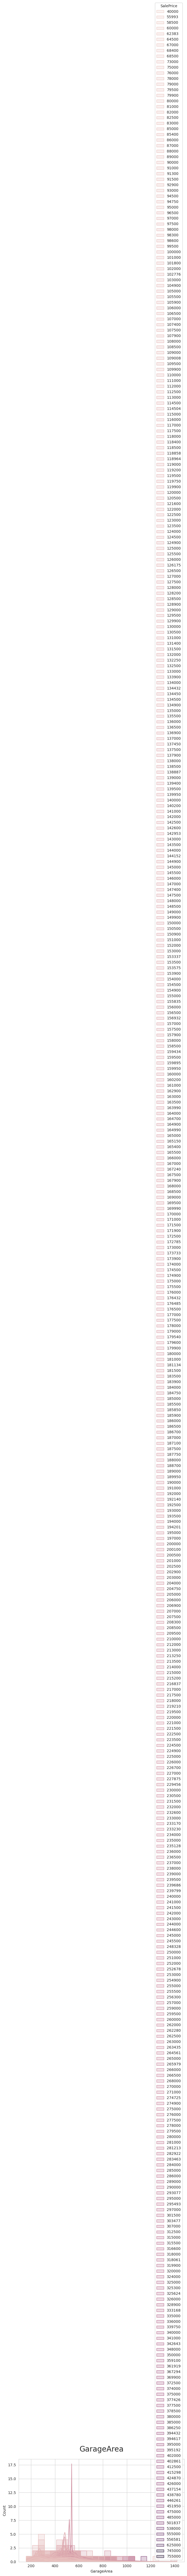

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

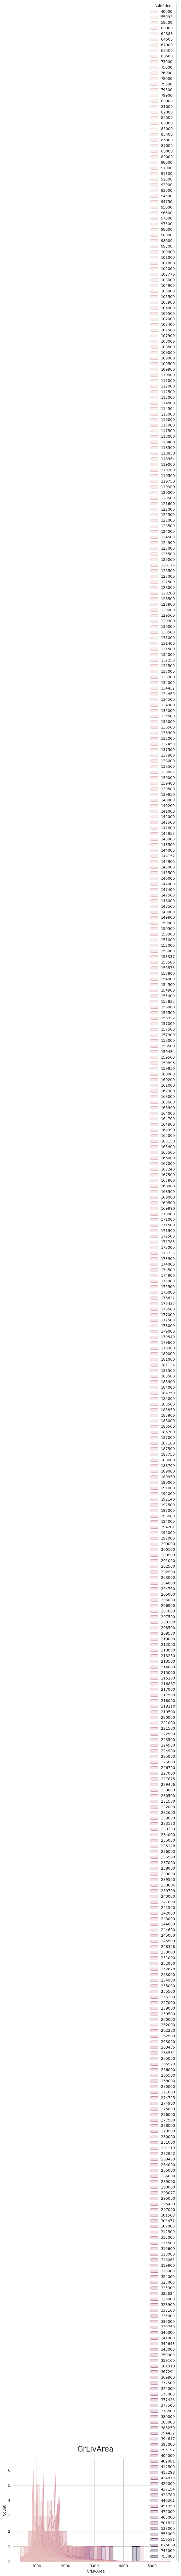

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

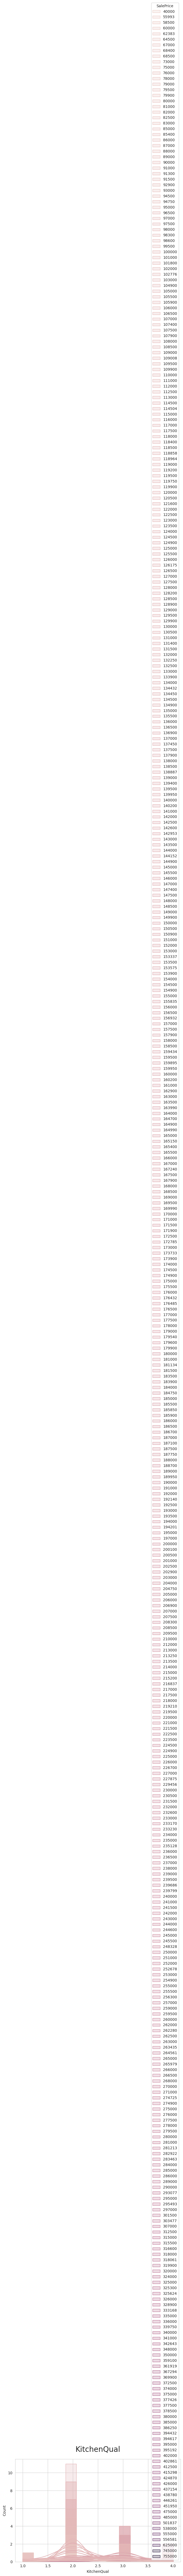

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

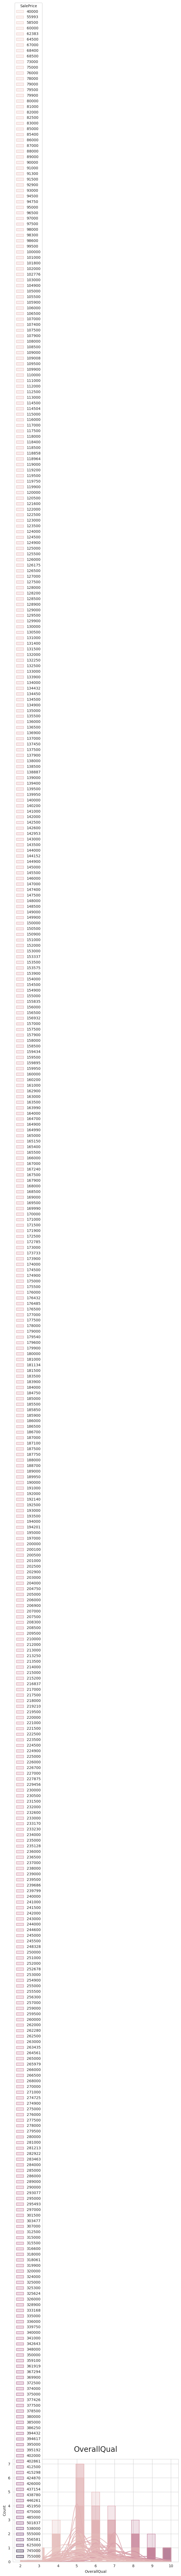

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

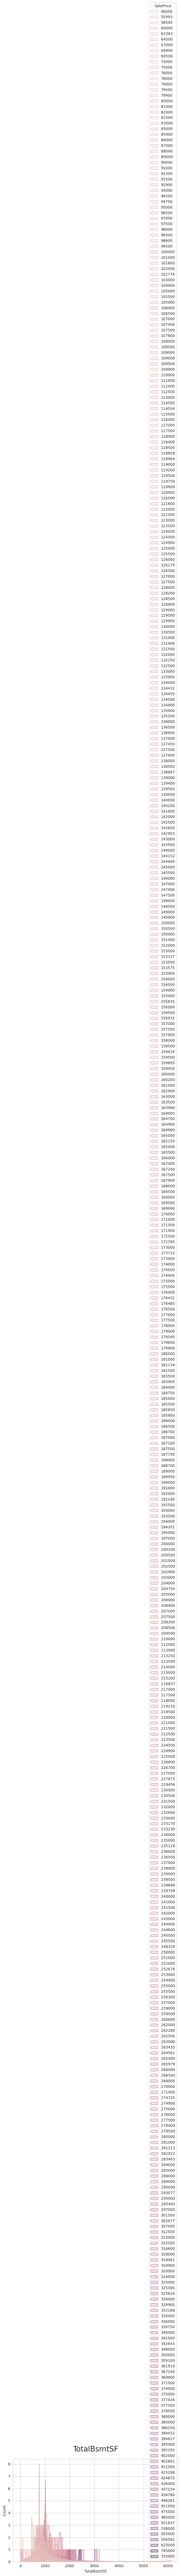

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

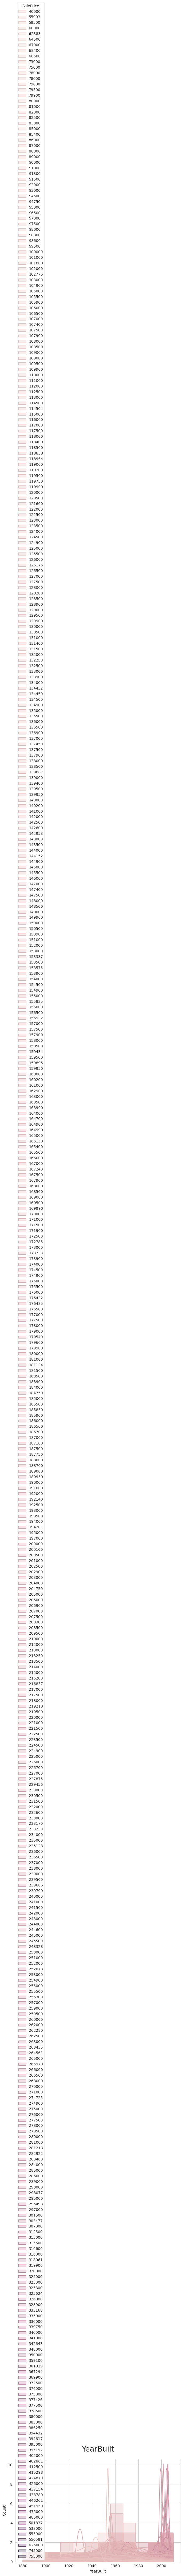

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue=target_var,order = df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True,element="step")
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

In [16]:
df_house_prices_records['BsmtExposure'] = df_house_prices_records['BsmtExposure'].replace({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

*Cheking BsmtExposure data type*

In [17]:
df_house_prices_records['BsmtExposure'].dtype

dtype('int64')

*Converting BsmtFinType1 to int*

In [18]:
df_house_prices_records['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'None', 'LwQ', 'BLQ'], dtype=object)

In [19]:
df_house_prices_records['BsmtFinType1'] = df_house_prices_records['BsmtFinType1'].replace({"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

*Cheking BsmtFinType1 data type*

In [20]:
df_house_prices_records['BsmtFinType1'].dtype

dtype('int64')

*Converting GarageFinish to int*

In [21]:
df_house_prices_records['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [22]:
df_house_prices_records['GarageFinish'] = df_house_prices_records['GarageFinish'].replace({"None":0, "Unf":1, "RFn":2, "Fin":3})

*Cheking GarageFinish data type*

In [23]:
df_house_prices_records['GarageFinish'].dtype

dtype('int64')

*Converting KitchenQual to int*

In [24]:
df_house_prices_records['KitchenQual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [25]:
df_house_prices_records['KitchenQual'] = df_house_prices_records['KitchenQual'].replace({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

*Cheking KitchenQual data type*

In [26]:
df_house_prices_records['KitchenQual'].dtype

dtype('int64')

In [27]:
df_house_prices_records.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0     856.0     854.0           3.0             1       706.0             6   
1    1262.0       0.0           3.0             4       978.0             5   
2     920.0     866.0           3.0             2       486.0             6   
5     796.0     566.0           1.0             1       732.0             6   
6    1694.0       0.0           3.0             3      1369.0             6   

   BsmtUnfSF  GarageArea  GarageFinish  GarageYrBlt  ...  LotArea  \
0      150.0       548.0             2         2003  ...   8450.0   
1      284.0       460.0             2         1976  ...   9600.0   
2      434.0       608.0             2         2001  ...  11250.0   
5       64.0       480.0             1         1993  ...  14115.0   
6      317.0       636.0             2         2004  ...  10084.0   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0         65.0       196.0         61.0            5            7   
1         80.0         0.0          0.0            8            6   
2         68.0       162.0         42.0            5            7   
5         85.0         0.0         30.0            5            5   
6         75.0       186.0         57.0            5            8   

   TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  
0        856.0       2003          2003     208500  
1       1262.0       1976          1976     181500  
2        920.0       2001          2002     223500  
5        796.0       1993          1995     143000  
6       1686.0       2004          2005     307000  

[5 rows x 22 columns]

### Inherited houses

In [28]:
df_inherited_houses = pd.read_csv(f"inputs/heritage-housing-issues/house-price-20211124T154130Z-001/house-price/inherited_houses.csv")
df_inherited_houses.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       896         0             2           No       468.0          Rec   
1      1329         0             3           No       923.0          ALQ   
2       928       701             3           No       791.0          GLQ   
3       926       678             3           No       602.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0      270.0              0       730.0          Unf  ...    11622   
1      406.0              0       312.0          Unf  ...    14267   
2      137.0              0       482.0          Fin  ...    13830   
3      324.0              0       470.0          Fin  ...     9978   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         80.0        0.0            0            6            5        882.0   
1         81.0      108.0           36            6            6       1329.0   
2         74.0        0.0           34            5            5        928.0   
3         78.0       20.0           36            6            6        926.0   

   WoodDeckSF  YearBuilt  YearRemodAdd  
0         140       1961          1961  
1         393       1958          1958  
2         212       1997          1998  
3         360       1998          1998  

[4 rows x 23 columns]

#### DataFrame Summary

In [29]:
df_inherited_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

*Converting 1stFlrSF	, 2ndFlrSF, BedroomAbvGr, EnclosedPorch, GrLivArea, LotArea, OpenPorchSF, WoodDeckSF to float.*
*Converting GarageYrBlt to int.*

In [30]:
df_inherited_houses['1stFlrSF'] = df_inherited_houses['1stFlrSF'].astype(float)
df_inherited_houses['2ndFlrSF'] = df_inherited_houses['2ndFlrSF'].astype(float)
df_inherited_houses['BedroomAbvGr'] = df_inherited_houses['BedroomAbvGr'].astype(float)
df_inherited_houses['EnclosedPorch'] = df_inherited_houses['EnclosedPorch'].astype(float)
df_inherited_houses['GrLivArea'] = df_inherited_houses['GrLivArea'].astype(float)
df_inherited_houses['LotArea'] = df_inherited_houses['LotArea'].astype(float)
df_inherited_houses['OpenPorchSF'] = df_inherited_houses['OpenPorchSF'].astype(float)
df_inherited_houses['WoodDeckSF'] = df_inherited_houses['WoodDeckSF'].astype(float)
df_inherited_houses['GarageYrBlt'] = df_inherited_houses['GarageYrBlt'].astype(int)
df_inherited_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      float64
 1   2ndFlrSF       4 non-null      float64
 2   BedroomAbvGr   4 non-null      float64
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      float64
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      int64  
 11  GrLivArea      4 non-null      float64
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      float64
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      float64
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

*Converting BsmtExposure to int*

In [31]:
df_inherited_houses['BsmtExposure'].unique()

array(['No'], dtype=object)

In [32]:
df_inherited_houses['BsmtExposure'] = df_inherited_houses['BsmtExposure'].replace({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

*Cheking BsmtExposure data type*

In [33]:
df_inherited_houses['BsmtExposure'].dtype

dtype('int64')

*Converting BsmtFinType1 to int*

In [34]:
df_inherited_houses['BsmtFinType1'].unique()

array(['Rec', 'ALQ', 'GLQ'], dtype=object)

In [35]:
df_inherited_houses['BsmtFinType1'] = df_inherited_houses['BsmtFinType1'].replace({"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

*Cheking BsmtFinType1 data type*

In [36]:
df_inherited_houses['BsmtFinType1'].dtype

dtype('int64')

*Converting GarageFinish to int*

In [37]:
df_inherited_houses['GarageFinish'].unique()

array(['Unf', 'Fin'], dtype=object)

In [38]:
df_inherited_houses['GarageFinish'] = df_inherited_houses['GarageFinish'].replace({"None":0, "Unf":1, "RFn":2, "Fin":3})

*Cheking GarageFinish data type*

In [39]:
df_inherited_houses['GarageFinish'].dtype

dtype('int64')

*Converting KitchenQual to int*

In [40]:
df_inherited_houses['KitchenQual'].unique()

array(['TA', 'Gd'], dtype=object)

In [41]:
df_inherited_houses['KitchenQual'] = df_inherited_houses['KitchenQual'].replace({"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

*Cheking KitchenQual data type*

In [42]:
df_inherited_houses['KitchenQual'].dtype

dtype('int64')

In [43]:
df_inherited_houses.head()

1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtExposure  BsmtFinSF1  BsmtFinType1  \
0     896.0       0.0           2.0             1       468.0             3   
1    1329.0       0.0           3.0             1       923.0             5   
2     928.0     701.0           3.0             1       791.0             6   
3     926.0     678.0           3.0             1       602.0             6   

   BsmtUnfSF  EnclosedPorch  GarageArea  GarageFinish  ...  LotArea  \
0      270.0            0.0       730.0             1  ...  11622.0   
1      406.0            0.0       312.0             1  ...  14267.0   
2      137.0            0.0       482.0             3  ...  13830.0   
3      324.0            0.0       470.0             3  ...   9978.0   

   LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0         80.0         0.0          0.0            6            5   
1         81.0       108.0         36.0            6            6   
2         74.0         0.0         34.0            5            5   
3         78.0        20.0         36.0            6            6   

   TotalBsmtSF  WoodDeckSF  YearBuilt  YearRemodAdd  
0        882.0       140.0       1961          1961  
1       1329.0       393.0       1958          1958  
2        928.0       212.0       1997          1998  
3        926.0       360.0       1998          1998  

[4 rows x 23 columns]

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [44]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df_house_prices_records.to_csv(f"outputs/datasets/collection/house_price_records_clean.csv", index=False)
df_inherited_houses.to_csv(f"outputs/datasets/collection/inherited_houses_clean.csv", index=False)
